In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("C://Users//Administrator//.vscode//Module 14//glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

<AxesSubplot:xlabel='Type', ylabel='count'>

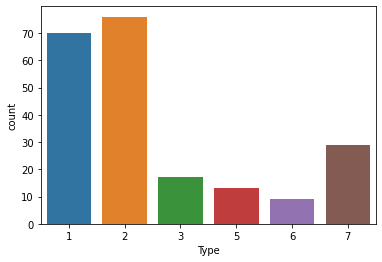

In [4]:
sns.countplot(data["Type"])

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV
from sklearn import metrics


In [6]:
X = data.iloc[:,0:9]
print(X.head())

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0


In [7]:
Y = data["Type"]
print(Y.head())

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


In [8]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 5, test_size = 0.30)

In [9]:

dt_model = DecisionTreeClassifier()
dt_model.fit(train_x, train_y)

DecisionTreeClassifier()

In [10]:

predicted = dt_model.predict(test_x)

In [11]:
rms = metrics.mean_squared_error(predicted, test_y)
print(rms)

1.876923076923077


In [12]:
print(metrics.accuracy_score(predicted, test_y))

0.7846153846153846


In [13]:
kf = KFold(n_splits=3)

In [14]:
for train_index, test_index in kf.split(X):
    
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    dt_model.fit(x_train, y_train)
    predicted = dt_model.predict(x_test)
    print("Accuracy Score : " + str(metrics.accuracy_score(predicted[0:], y_test.values)))

Accuracy Score : 0.013888888888888888
Accuracy Score : 0.22535211267605634
Accuracy Score : 0.0


In [15]:
print(cross_val_score(dt_model, X, Y, cv = 3, scoring="accuracy").mean())

0.5558815858111633


In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

parameter_candidates = [{1},{2}]

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, Y)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


In [18]:
rf_model = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=200, oob_score = True)

cross_val_score(rf_model, X, Y, cv=10, scoring='accuracy')

array([0.68181818, 0.81818182, 0.81818182, 0.68181818, 0.71428571,
       0.9047619 , 0.9047619 , 0.52380952, 0.80952381, 0.80952381])